In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from keras.layers import Flatten,MaxPooling1D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool2D
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model

In [2]:
df_final = pd.read_csv(r"C:\Users\karth\Downloads\Project_Finalyr\TATAMOTORS.NS.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [3]:
df_final.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-12-25,72.819626,72.819626,72.819626,72.819626,53.472767,0.0
1995-12-26,72.819626,72.819626,72.819626,72.819626,53.472767,0.0
1995-12-27,72.819626,72.819626,72.819626,72.819626,53.472767,0.0
1995-12-28,72.819626,72.819626,72.819626,72.819626,53.472767,0.0
1995-12-29,72.819626,72.819626,72.819626,72.819626,53.472767,0.0


In [4]:
df_final.shape

(6528, 6)

In [5]:
df_final.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6.513000e+03
mean,175.282809,178.038443,172.212190,175.014564,167.821777,1.517004e+07
std,148.121448,149.940735,146.050027,147.901388,151.164142,2.104004e+07
min,11.114574,11.631977,11.028340,11.267879,9.099406,0.000000e+00
25%,56.395107,58.064072,55.017143,56.310650,45.254539,5.009173e+06
50%,130.586670,133.758163,127.640923,130.845367,120.133804,8.909026e+06
75%,270.500000,274.505646,265.403290,269.558716,266.600006,1.659418e+07
max,600.212097,605.901123,589.873047,598.134399,597.892273,3.905778e+08


In [6]:
# print("checking if any null values are present\n", df.isna().sum())
df_final.isnull().values.any()

True

In [7]:
df_final = df_final.fillna(method='ffill')

In [8]:
# print("checking if any null values are present\n", df.isna().sum())
df_final.isnull().values.any()

False

<AxesSubplot:xlabel='Date'>

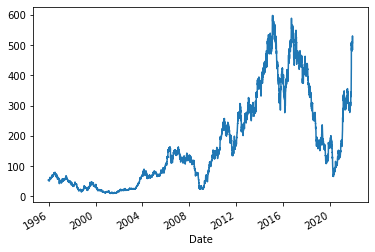

In [9]:
df_final['Adj Close'].plot()

In [10]:
X=df_final.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)

<AxesSubplot:title={'center':'Correlation with Adj Close'}>

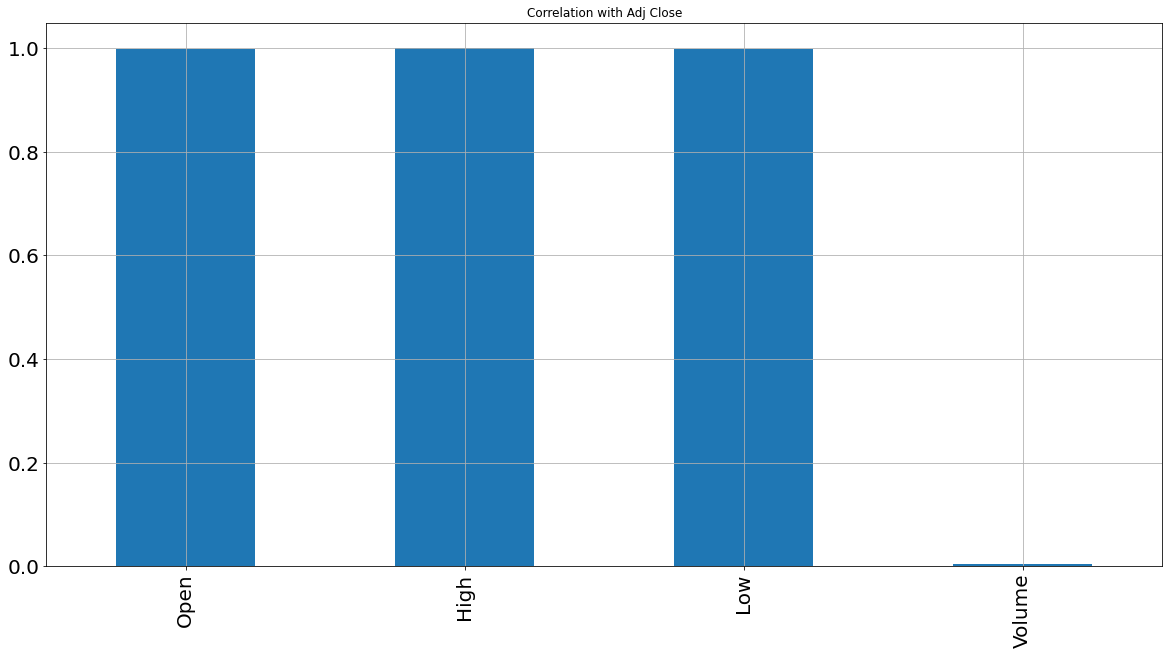

In [11]:
X.corrwith(df_final['Adj Close']).plot.bar(
        figsize = (20, 10), title = "Correlation with Adj Close", fontsize = 20,
        rot = 90, grid = True)


In [12]:
test = df_final
# Target column
target_adj_close = pd.DataFrame(test['Adj Close'])
display(test.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-12-25,72.819626,72.819626,72.819626,72.819626,53.472767,0.0
1995-12-26,72.819626,72.819626,72.819626,72.819626,53.472767,0.0
1995-12-27,72.819626,72.819626,72.819626,72.819626,53.472767,0.0
1995-12-28,72.819626,72.819626,72.819626,72.819626,53.472767,0.0
1995-12-29,72.819626,72.819626,72.819626,72.819626,53.472767,0.0


In [13]:
# selecting Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Volume']

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
1995-12-25,0.104745,0.102963,0.106749,0.0
1995-12-26,0.104745,0.102963,0.106749,0.0
1995-12-27,0.104745,0.102963,0.106749,0.0
1995-12-28,0.104745,0.102963,0.106749,0.0
1995-12-29,0.104745,0.102963,0.106749,0.0


In [15]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Volume
Date,,,,
1995-12-25,0.104745,0.102963,0.106749,0.0
1995-12-26,0.104745,0.102963,0.106749,0.0
1995-12-27,0.104745,0.102963,0.106749,0.0
1995-12-28,0.104745,0.102963,0.106749,0.0
1995-12-29,0.104745,0.102963,0.106749,0.0


Shape of features :  (6528, 4)
Shape of target :  (6528, 1)


,Open,High,Low,Volume
Date,,,,
2021-11-12,0.841687,0.837866,0.840159,0.053080
2021-11-15,0.840498,0.846869,0.852511,0.046124
2021-11-16,0.841602,0.866978,0.855448,0.143116
2021-11-17,0.864263,0.883553,0.879721,0.124081
2021-11-18,0.883276,0.879346,0.846983,0.120841


,Adj Close
Date,
2021-11-12,505.450012
2021-11-15,519.049988
2021-11-16,530.150024
2021-11-17,509.700012
2021-11-18,486.100006



 -----After process------ 

Shape of features :  (6438, 4)
Shape of target :  (6438, 1)


,Adj Close
Date,
2021-07-05,316.899994
2021-07-06,317.100006
2021-07-07,306.350006
2021-07-08,306.299988
2021-07-09,307.450012


In [16]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [17]:

X_train.shape

(5853, 4)

In [18]:
X_test.shape

(585, 4)

In [19]:
y_train.shape

(5853,)

In [20]:
y_test.shape

(585,)

In [21]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

In [22]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print( X_train.shape[1])

4


In [23]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(16))
# model_lstm.add(Dropout(0.25))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=40, batch_size=8, verbose=1, shuffle=False)

Epoch 1/40
732/732 [==============================] - 2s 1ms/step - loss: 1342.2496
Epoch 2/40
732/732 [==============================] - 1s 1ms/step - loss: 532.7249
Epoch 3/40
732/732 [==============================] - 1s 1ms/step - loss: 327.2177
Epoch 4/40
732/732 [==============================] - 1s 1ms/step - loss: 202.6965
Epoch 5/40
732/732 [==============================] - 1s 1ms/step - loss: 133.2819
Epoch 6/40
732/732 [==============================] - 1s 1ms/step - loss: 98.6390
Epoch 7/40
732/732 [==============================] - 1s 1ms/step - loss: 82.4655
Epoch 8/40
732/732 [==============================] - 1s 1ms/step - loss: 74.5050
Epoch 9/40
732/732 [==============================] - 1s 1ms/step - loss: 69.8656
Epoch 10/40
732/732 [==============================] - 1s 1ms/step - loss: 66.5718
Epoch 11/40
732/732 [==============================] - 1s 978us/step - loss: 63.8965
Epoch 12/40
732/732 [==============================] - 1s 949us/step - loss: 61.5809
Epo

In [24]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)

The R2 score on the Train set is:	0.993
The R2 score on the Test set is:	0.986


In [25]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test)

19/19 [==============================] - 0s 760us/step - loss: 81.1186


In [26]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test)

19/19 [==============================] - 0s 735us/step - loss: 81.1186


In [27]:
print('LSTM: %f'%score_lstm)

LSTM: 81.118607


In [28]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

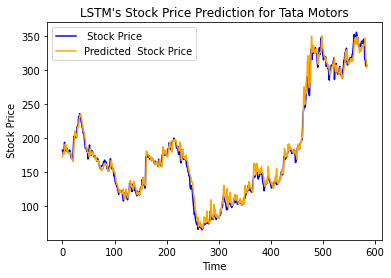

In [29]:
# plt.plot(y_test, label='True')
# plt.plot(y_pred_test_LSTM, label='LSTM')
# plt.title("LSTM's_Prediction ")
# plt.xlabel('Observation')
# plt.ylabel('USD')
# plt.legend()
# plt.show()
plt.plot(y_test, color = 'blue', label = ' Stock Price')
plt.plot(y_pred_test_LSTM, color = 'orange', label = 'Predicted  Stock Price')
plt.title("LSTM's Stock Price Prediction for Tata Motors")
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [30]:
col1 = pd.DataFrame(y_test, columns=['True'])

col2 = pd.DataFrame(y_pred_test_LSTM, columns=['LSTM_prediction'])

# col3 = pd.DataFrame(history_model_lstm.history['loss'], columns=['Loss_LSTM'])
results = pd.concat([col1, col2], axis=1)
results.to_excel('PredictionResults_LSTM.xlsx')